Walter Saldaña #19897

# Laboratorio 7: La Ciencia de Datos en Autopiloto

Importar librerías

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics
from scipy.stats import norm
import numpy as np

%pip install autogluon
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.core.metrics import make_scorer

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Carga de datos

In [51]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Análisis exploratorio

### Descripción del dataset
Contiene información de la frecuencia de varios síntomas, en pacientes, que suelen ser indicadores de diabetes, así como la información si los resultados de la prueba de diabetes fue positiva o negativa.

### Detalle de las variables
|Variable|Detalle|Clasificación|
|:--|:--|:--|
|Pregnancies|Número de veces que ha estado embarazada|Cuantitativa discreta|
|GlucosePlasma|Concentración de glucosa|Cuantitativa discreta|
|BloodPressure|Presión de sangre diastólica (mm Hg)|Cuantitativa discreta|
|Skin|Grosor del pliegue cutáneo del Triscep (mm)|Cuantitativa discreta|
|Insulin|Suero de insulina 2-Horas (mu U/ml)|Cuantitativa discreta|
|BMI|Indice de masa corporal (peso en Kg/(estatura en mts)2)|Cuantitativa continua|
|DiabetesPedigreeFunction|Función de pedigree de diabetes|Cuantitativa continua|
|Age:|Edad en años|Cuantitativa discreta|
|Outcome|Diabetes ó no diabetes (0 ó 1)|Cualitativa nominal|

In [52]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Resúmen estadístico del dataset

In [53]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


En primera instancia vemos datos atípicos que no pueden existir en una persona viva, por ejemplo valor 0 en glucosa, presión, BMI, grueso de piel, o insulina. Por lo que se removeran.

In [55]:
indexes_0 = df[df['Glucose'] == 0]
df.drop(indexes_0.index, inplace=True)

indexes_0 = df[df['BloodPressure'] == 0]
df.drop(indexes_0.index, inplace=True)

indexes_0 = df[df['SkinThickness'] == 0]
df.drop(indexes_0.index, inplace=True)

indexes_0 = df[df['Insulin'] == 0]
df.drop(indexes_0.index, inplace=True)

indexes_0 = df[df['BMI'] == 0]
df.drop(indexes_0.index, inplace=True)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Datos atípicos

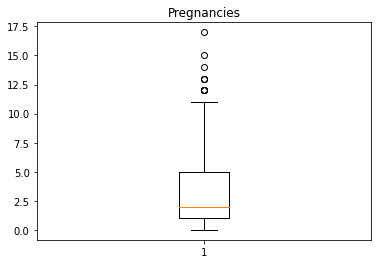

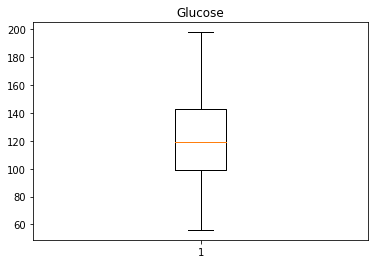

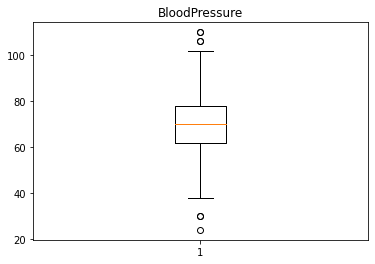

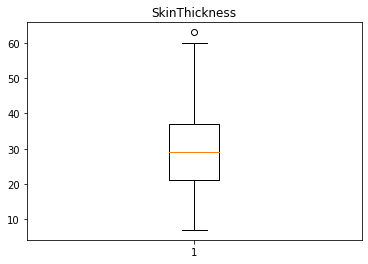

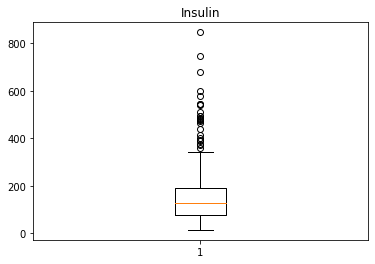

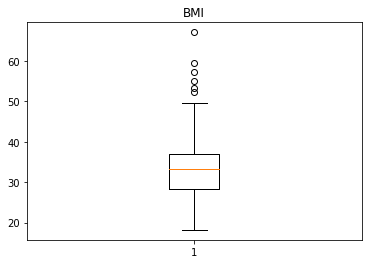

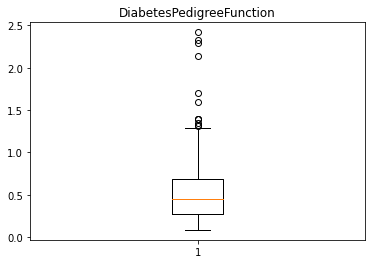

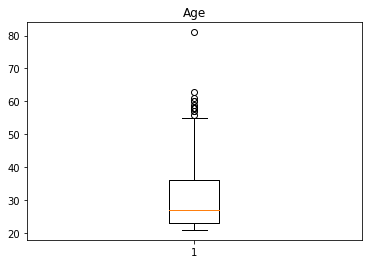

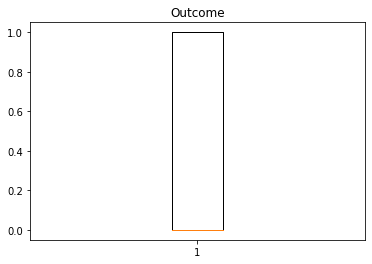

In [56]:
for column in df.columns:
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()

A pesar de que se identifican datos que podrían parecer ser atípicos, ninguno se sale del margen de condiciones que naturalmente pueda padecer una persona. Por lo tanto, se espera que aporten información al entrenamiento, puesto a que dada la naturaleza de la diabetes, se sabe que mientras más extremos son los síntomas (atípicos), más probable es que la condición sea más grave.

### Normalidad y frecuencia de los datos

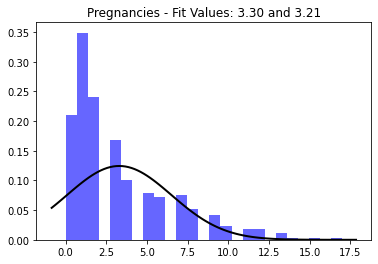

Kurtosis:  1.4863417448340144
Sesgo:  1.3355962679659634


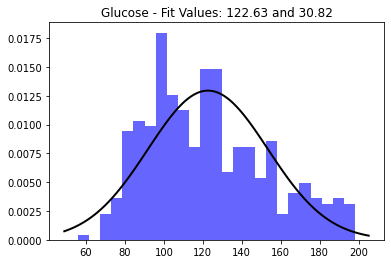

Kurtosis:  -0.48322696131655807
Sesgo:  0.5178499371777541


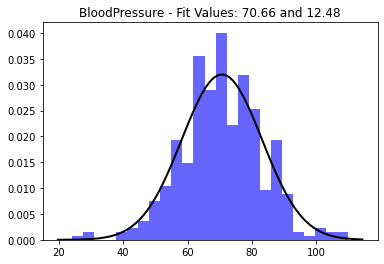

Kurtosis:  0.7954044447041766
Sesgo:  -0.08751639156004226


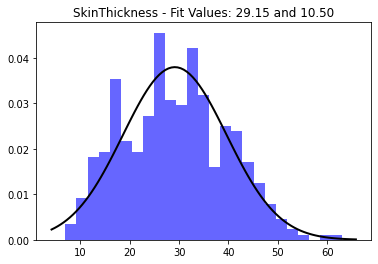

Kurtosis:  -0.45769608865023415
Sesgo:  0.20931080688997156


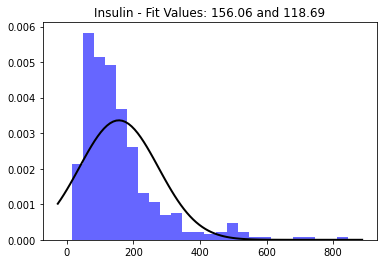

Kurtosis:  6.356505089203407
Sesgo:  2.1651161863573374


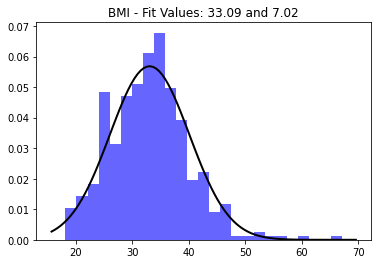

Kurtosis:  1.5565130639494997
Sesgo:  0.663485056210774


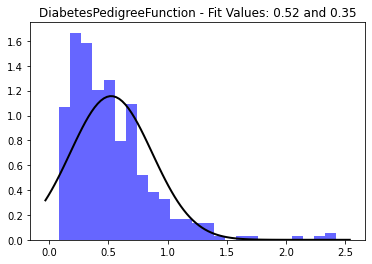

Kurtosis:  6.36668987920683
Sesgo:  1.9591011676798942


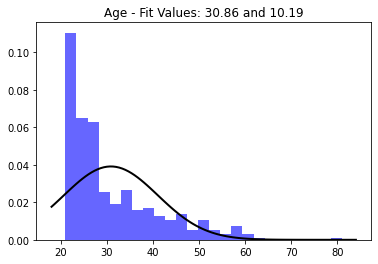

Kurtosis:  1.7375308358734136
Sesgo:  1.4036065447817476


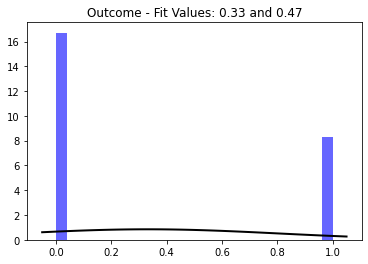

Kurtosis:  -1.4921294169544117
Sesgo:  0.7179900314836882


In [57]:
def show_normality(data, title=''):
    mu, std = norm.fit(data)
    plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)
    title = title + " - Fit Values: {:.2f} and {:.2f}".format(mu, std)
    plt.title(title)
    
    plt.show()
    
    kurtosis = data.kurtosis()
    skew = data.skew()
    print('Kurtosis: ', kurtosis)
    print('Sesgo: ', skew)

for column in df.columns:
    show_normality(df[column], column)

Contrario a lo que se intuiría de un dataset de síntomas de salud, ninguna de las variables se comporta de forma normal, pues todas tienen una kurtosis muy alejada de 1.

La variable que mejor se aproxima a una variable normal es la presión sanguínea con curtósis de 0.8.

También se destaca que hay un sesgo demasiado grande en las edades (de 1.13), el sesgo está dirigido a edades de jóvenes, lo cual puede perjudicar el entrenamiento y análisis dado que sabemos que la diabetes es más común en personas mayores. Claramente la edad también es una variable que tiene influencia en la diabetes, pero la desproporción puede perjudicar los resultados.

## Autogluon
### Predecir la columna "Outcome"

In [58]:
train, test = train_test_split(df, test_size=0.2, random_state=0)

In [59]:
train_data = TabularDataset(train)
predictor = TabularPredictor(label="Outcome").fit(train_data)
test_data = TabularDataset(test)
predictions = predictor.predict(test_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20221008_010027/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221008_010027/"
AutoGluon Version:  0.5.2
Python Version:     3.9.5
Operating System:   Linux
Train Data Rows:    313
Train Data Columns: 8
Label Column: Outcome
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    860.92 MB
	Train Data (Original)  Memory Usage: 0.02 MB (0.0% of available memory)
	Inferring data type of each feature 

### Utilizar la calidad pre-determinada "best_quality" y la métrica "accuracy"

In [60]:
ag_accuracy_scorer = make_scorer(name='accuracy',
                                 score_func=sklearn.metrics.accuracy_score,
                                 optimum=1,
                                 greater_is_better=True)

### Evaluar el rendimiento de los modelos entrenados, a través de la graficación del tablero de líderes "leaderboard", e indicar el mejor de los modelos.

In [61]:
leaderboard = predictor.leaderboard(test_data)

                  model  score_test  score_val  pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost    0.822785   0.857143        0.003075       0.002644  0.270504                 0.003075                0.002644           0.270504            1       True          7
1   WeightedEnsemble_L2    0.822785   0.873016        0.048279       0.039937  0.842188                 0.002166                0.000309           0.241565            2       True         14
2        ExtraTreesEntr    0.797468   0.825397        0.049622       0.040103  0.328471                 0.049622                0.040103           0.328471            1       True          9
3        NeuralNetTorch    0.784810   0.841270        0.006902       0.011201  0.785102                 0.006902                0.011201           0.785102            1       True         12
4       NeuralNetFastAI    0.784810   0.84127

El mejor modelo fue **CatBoost**, con un score test de 0.82, además de que fue uno de los más eficientes en tiempo de entrenamiento.

### Graficar la matriz de confusión

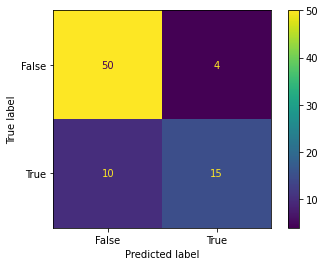

In [62]:
confusion_matrix = sklearn.metrics.confusion_matrix(test_data['Outcome'], predictions)

cm_display = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=[False, True])

cm_display.plot()
plt.show()

Como se ve en la matriz de confusión, el modelo tuvo ciertas carencias de precisión en la predicción, pues acertó en un 92% de los casos que no son de diabetes, pero solo un 60% de las veces en los que si eran casos de diabetes, lo cual es preocupante dado que a un 40% de los pacientes se les diagnosticaría no tener diabetes cuando en realidad si tienen. Si bien los falsos positivos también son importantes de identificar, no son tan peligrosos como los falsos negativos, pues de salir positivo se procede a realizar exámenes de verificación, pero es probable que al salir falso negativo se confien y no realicen más pruebas. 

Esto es algo que se refleja con el relativo bajo score de precisión del mejor modelo (0.82).

Por lo tanto, se debería de procurar buscar alternativas de entrenamiento o incrementar los datos para obtener más resultados que brinden un diagnóstico más acertado para tomar acción temprano para los pacientes.